In [1]:
# Load packages
import pandas as pd
import numpy as np
import cv2 as cv

In [2]:
from sklearn.datasets import make_classification
from sklearn.model_selection import train_test_split, GridSearchCV
from sklearn.pipeline import Pipeline
from sklearn.svm import LinearSVC

In [3]:
from sklearn.model_selection import cross_val_score

In [26]:
from sklearn.metrics import make_scorer, f1_score

In [4]:
import matplotlib.pyplot as plt

In [5]:
import seaborn as sns

In [6]:
import time

In [7]:
import pickle

## Linear SVC on HOG Data

**Load train data**

In [16]:
train_df = pd.read_csv('gray_small_train_set.csv')



In [9]:
train_hog_df = pd.read_csv('hog_fd_train.csv')

In [14]:
sumy_df =  pd.read_csv('histy_train.csv')

In [15]:
sumx_df =  pd.read_csv('histx_train.csv')

In [12]:
train_df.shape, train_hog_df.shape, sumy_df.shape, sumx_df.shape



((3377, 1201), (3377, 1729), (3377, 41), (3377, 31))

**Create train data for fitting LinearSVC**

In [12]:
#train_data = pd.concat([train_hog_df, sumy_df.iloc[:,1:], sumx_df.iloc[:,1:]], axis=1)

In [13]:
#train_data.head(3)

,label,fd_value0,fd_value1,fd_value2,fd_value3,fd_value4,fd_value5,fd_value6,fd_value7,fd_value8,...,sum_x_20,sum_x_21,sum_x_22,sum_x_23,sum_x_24,sum_x_25,sum_x_26,sum_x_27,sum_x_28,sum_x_29
0,0.0,0.016479,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.705982,...,2750,7250,10000,10000,10000,10000,10000,10000,10000,10000
1,2.0,0.000000,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.000000,...,6750,9250,10000,10000,10000,10000,10000,10000,10000,10000
2,2.0,0.000000,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.000000,...,8000,8500,10000,10000,10000,10000,10000,10000,10000,10000


In [34]:
train_data = train_hog_df

In [35]:
train_data.shape

(3377, 1729)

In [ ]:
#train_data.head(3)

In [36]:
x_train = train_data.iloc[:, 1:].values.astype(np.float32)
y_train =train_data['label'].values

In [37]:
x_train.shape, train_data.shape

((3377, 1728), (3377, 1729))

**Load and format test data**

In [17]:
test_df = pd.read_csv('gray_small_test_set.csv')



In [18]:
test_df.shape

(965, 1201)

In [24]:
test_hog_df = pd.read_csv('hog_fd_test.csv')

In [18]:
sumy_test_df =  pd.read_csv('histy_test.csv')

In [19]:
sumx_test_df =  pd.read_csv('histx_test.csv')

In [27]:
#test_data = pd.concat([test_hog_df, sumy_test_df.iloc[:,1:], sumx_test_df.iloc[:,1:]], axis=1)



In [38]:
test_data = test_hog_df

In [39]:
 test_data.shape

(965, 1729)

In [40]:
x_test = test_data.iloc[:, 1:].values.astype(np.float32)
y_test =  test_data['label'].values

In [41]:
x_train.shape, x_test.shape

((3377, 1728), (965, 1728))

**fit model with HOG vector only**

In [42]:
#12:02
# Classification with a linear SVM
percent=100
start_time = time.time()
svc = LinearSVC(dual=False, random_state=123)
params_grid = {"C": [10 ** k for k in range(-1, 4)]}
clf = GridSearchCV(svc, params_grid)
clf.fit(x_train, y_train)
print('percent complete: ',percent, end =" - %s seconds -\n" % \
              (time.time() - start_time), flush=False)


percent complete:  100 - 25.95174813270569 seconds -


**Accuracy Score on Test data**

In [43]:
print("Accuracy on the test set with HOG vector data: {:.3f}".format(clf.score(x_test, y_test)))

Accuracy on the test set with HOG vector data: 0.248


### LinearSVC on Sum of X and Y data

In [20]:
train_data = pd.concat([sumy_df, sumx_df.iloc[:,1:]], axis=1)
x_train = train_data.iloc[:, 1:].values.astype(np.float32)
y_train =train_data['label'].values


test_data = pd.concat([sumy_test_df, sumx_test_df.iloc[:,1:]], axis=1)
test_data.shape
x_test = test_data.iloc[:, 1:].values.astype(np.float32)
y_test =  test_data['label'].values

In [21]:
#12:07
# Classification with a linear SVM
percent=100
start_time = time.time()
svc = LinearSVC(dual=False, random_state=123)
params_grid = {"C": [10 ** k for k in range(-1, 4)]}
clf = GridSearchCV(svc, params_grid)
clf.fit(x_train, y_train)
print('percent complete: ',percent, end =" - %s seconds -\n" % \
              (time.time() - start_time), flush=False)

percent complete:  100 - 10.785516500473022 seconds -


**Accuracy Score on Test data**

In [22]:
print("Accuracy on the test set with SUM X and Y vector data: {:.3f}".format(clf.score(x_test, y_test)))

Accuracy on the test set with SUM X and Y vector data: 0.902


**F1 Scores**

In [27]:
f1_scorer = make_scorer(f1_score, average='micro')

In [29]:
# Perform cross-validation and get the F1 score
scores = cross_val_score(clf, x_test, y_test, scoring=f1_scorer)
print(scores)

[0.85492228 0.88601036 0.84455959 0.87046632 0.8238342 ]


In [32]:
sum(scores)/len(scores)

0.8559585492227979

### Check accuracy per category 


In [47]:
decipher_key = {
    0:"Pants",
    1:"Tshirts",
    2:"Watches",
    3:"Casual Shoes"
 
}

In [48]:
x_tlist =[]
y_tlist = []
tlabel =[]
for i in range(4):
    indices = np.where(y_test == i)[0]
    y_tlist.append(y_test[indices])
    x_tlist.append(x_test[indices])
    tlabel.append(decipher_key[i])
    
y_tlist[0].shape, y_tlist[0][0:3]
    

((239,), array([0, 0, 0], dtype=int64))

In [50]:
for i in range(4):
    print("Accuracy on the",tlabel[i]," test set with grayscale image: {:.3f}".\
          format(clf.score(x_tlist[i], y_tlist[i])))

Accuracy on the Pants  test set with grayscale image: 0.908
Accuracy on the Tshirts  test set with grayscale image: 0.899
Accuracy on the Watches  test set with grayscale image: 0.880
Accuracy on the Casual Shoes  test set with grayscale image: 0.920


**Generate Confusion Matrix For Each Result**

In [51]:
from sklearn.metrics import confusion_matrix
#x_tlist[i]
#y_tlist[i]

# Use the fitted model to make predictions on the same data used for fitting
y_pred = clf.predict(x_test)

# Generate the confusion matrix
cm = confusion_matrix(y_test, y_pred)

#print(cm)


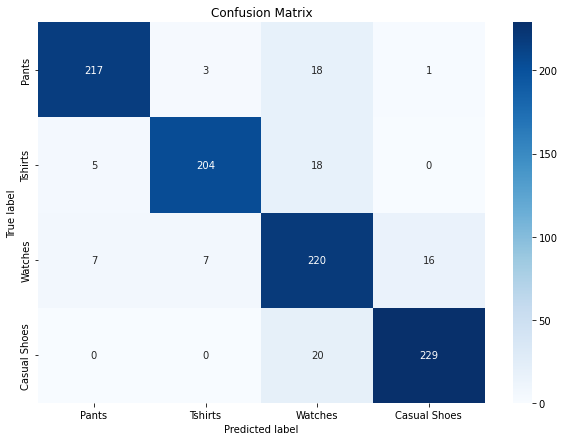

In [52]:
# Create a heatmap
# Create a list of labels
labels = [decipher_key[i] for i in range(4)]
plt.figure(figsize=(10,7))
#sns.heatmap(cm, annot=True, fmt='d', cmap='Blues')
sns.heatmap(cm, annot=True, fmt='d', cmap='Blues', xticklabels=labels, yticklabels=labels)

# Add labels to the plot
plt.xlabel('Predicted label')
plt.ylabel('True label')
plt.title('Confusion Matrix')

# Show the plot
plt.show()

**Including the HOG vector, allows us to reclassify an image from Watches to Tshirts (6 to 5) increasing the Tshirt TP count from 220 to 221**

**Pull Up Examples of False Positives (Tshirts)**

In [53]:
# Assuming y_true is your list of true labels and y_pred is your list of predicted labels
# And X_data is your original dataset

misclassified_indexes = []

for i in range(len(y_test)):
    # If true label is 'Tshirts' (which corresponds to 1)
    # and predicted label is 'Casual Shoes' (which corresponds to 3)
    if (y_test[i] == 1) and (y_pred[i] == 2):
        misclassified_indexes.append(i)

# Now, misclassified_indexes contains the indexes of all misclassified examples
# You can use it to get the corresponding data from X_data
#misclassified_data = x_test[misclassified_indexes]

In [54]:
misclassified_indexes

[49,
 87,
 107,
 207,
 223,
 255,
 337,
 398,
 418,
 429,
 432,
 555,
 621,
 908,
 916,
 933,
 936,
 941]

In [55]:
test_df = pd.read_csv('output_rgb_test.csv')

#test_img = test_df.iloc[:, 1:].values.astype(np.float32)
test_img = test_df.iloc[:, 1:].values.astype(np.uint8)

test_label = test_df['label'].values

#img_rgb = (img_rgb * 255).astype(np.uint8) before axarr.imshow(img_rgb)

<Figure size 2016x2016 with 0 Axes>

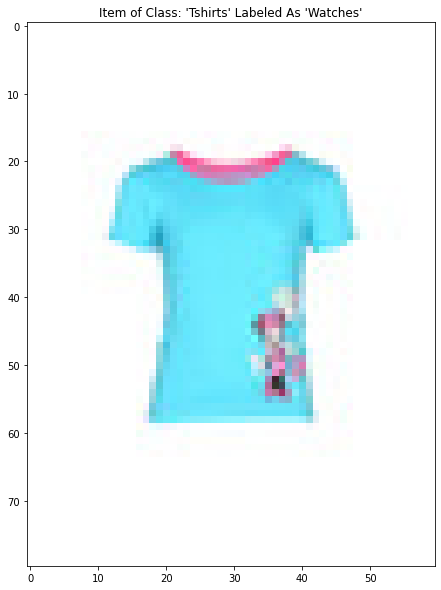

In [56]:
temp =misclassified_indexes[0]
img_rgb  = np.reshape(test_img[temp], newshape=(80,60,3))
plt.figure(figsize = (28,28))
f, axarr = plt.subplots(1,1, figsize=(10, 10))
title = "Item of Class: \'" +decipher_key[test_label[temp]] +"\' Labeled As \'"+decipher_key[y_pred[temp]]+"\'"
axarr.title.set_text(title)
axarr.imshow(img_rgb)

**It appers the white shirt is getting this image mislabeled**

**Pull Up Examples of False Positives (Watches as Tshirts)**

In [57]:
# Assuming y_true is your list of true labels and y_pred is your list of predicted labels
# And X_data is your original dataset

misclassified_indexes = []

for i in range(len(y_test)):
    # If true label is 'Tshirts' (which corresponds to 1)
    # and predicted label is 'Casual Shoes' (which corresponds to 3)
    if (y_test[i] == 2) and (y_pred[i] == 1):
        misclassified_indexes.append(i)

# Now, misclassified_indexes contains the indexes of all misclassified examples
# You can use it to get the corresponding data from X_data
#misclassified_data = x_test[misclassified_indexes]

<Figure size 2016x2016 with 0 Axes>

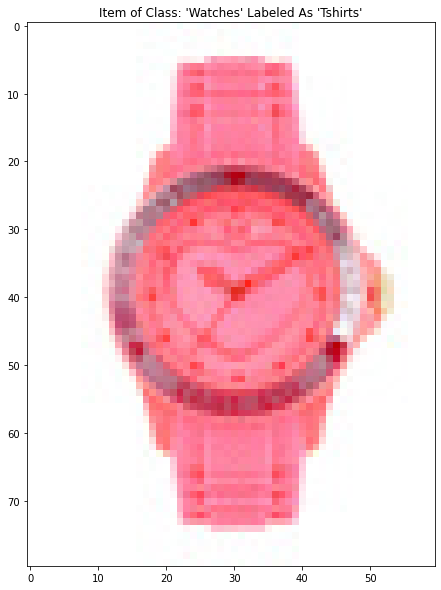

In [58]:
temp =misclassified_indexes[0]
img_rgb  = np.reshape(test_img[temp], newshape=(80,60,3))
plt.figure(figsize = (28,28))
f, axarr = plt.subplots(1,1, figsize=(10, 10))
title = "Item of Class: \'" +decipher_key[test_label[temp]] +"\' Labeled As \'"+decipher_key[y_pred[temp]]+"\'"
axarr.title.set_text(title)
axarr.imshow(img_rgb)

<Figure size 2016x2016 with 0 Axes>

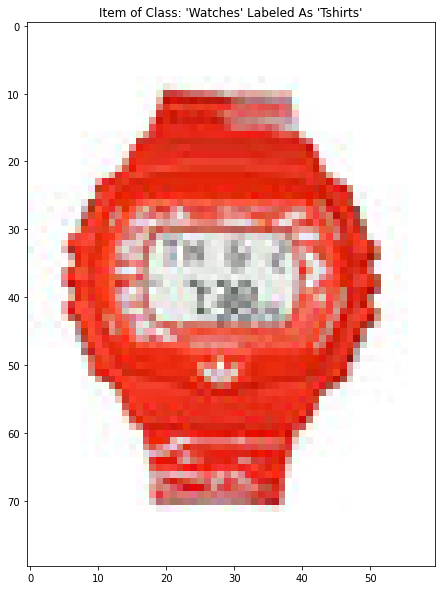

In [59]:
temp =misclassified_indexes[1]
img_rgb  = np.reshape(test_img[temp], newshape=(80,60,3))
plt.figure(figsize = (28,28))
f, axarr = plt.subplots(1,1, figsize=(10, 10))
title = "Item of Class: \'" +decipher_key[test_label[temp]] +"\' Labeled As \'"+decipher_key[y_pred[temp]]+"\'"
axarr.title.set_text(title)
axarr.imshow(img_rgb)

<Figure size 2016x2016 with 0 Axes>

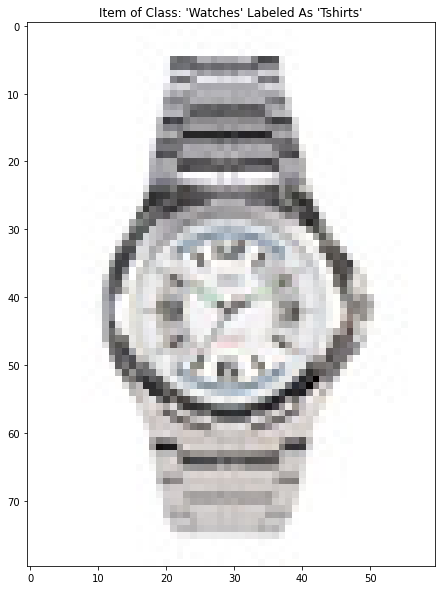

In [60]:
temp =misclassified_indexes[2]
img_rgb  = np.reshape(test_img[temp], newshape=(80,60,3))
plt.figure(figsize = (28,28))
f, axarr = plt.subplots(1,1, figsize=(10, 10))
title = "Item of Class: \'" +decipher_key[test_label[temp]] +"\' Labeled As \'"+decipher_key[y_pred[temp]]+"\'"
axarr.title.set_text(title)
axarr.imshow(img_rgb)

### LinearSVC on HOG + SumXY Combined: does not converge